# Titanic EDA

In [64]:
# the normal imports
import numpy as np
import pandas as pd
from numpy.random import randn

# import the stats library from numpy
from scipy import stats

# These are the plitting modules and libraries we'll use'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# command so that plots appear in the ipython notebook
%matplotlib inline

plt.rcParams["patch.force_edgecolor"] = True


In [48]:
titanic_df = sns.load_dataset("titanic")

In [49]:
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [50]:
titanic_df.drop(columns='who', inplace = True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False


In [51]:
titanic_df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False


In [23]:
titanic_df.info()
type(titanic_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


pandas.core.frame.DataFrame

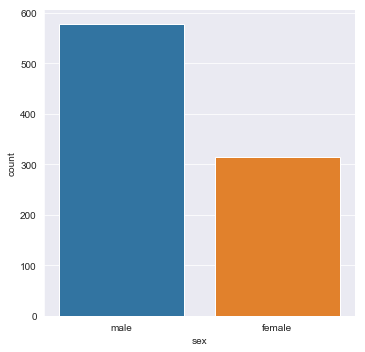

In [65]:
sns.catplot(x = 'sex', 
            kind= 'count',
            data = titanic_df)

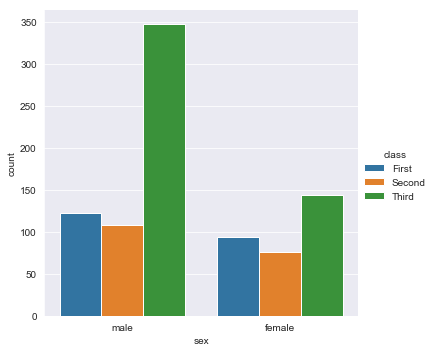

In [66]:
sns.catplot(x = 'sex',
            data=titanic_df,
            kind = 'count',
            hue = 'class')
plt.show()

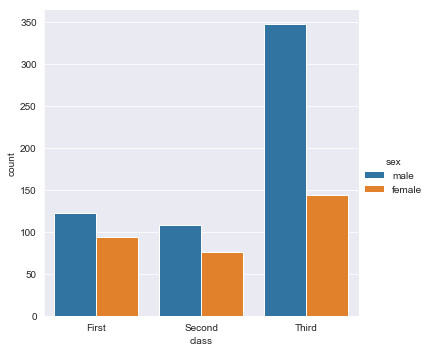

In [67]:
sns.catplot(x = 'class', 
               data=titanic_df,
               kind = 'count',hue = 'sex')

In [68]:
# we want to check b/w male female and children
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex    

In [69]:
titanic_df.loc[:,'person'] = titanic_df.loc[:,['age', 'sex']].apply(male_female_child, axis = 1 )
titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,person
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,female


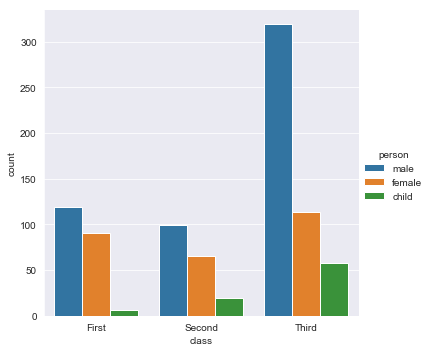

In [70]:
sns.catplot( 'class', 
            data = titanic_df,
            kind = 'count', 
            hue = 'person')

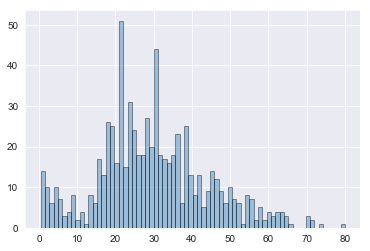

In [74]:
sns.distplot(titanic_df.loc[:,['age']].dropna(),
             kde = False,
             hist = True, 
             bins = 70,
             hist_kws=dict(edgecolor="k", linewidth=1))
sns.set_style("darkgrid")

In [91]:
titanic_df['age'].mean()

29.69911764705882

In [92]:
titanic_df.loc[:,'person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

## Lecture 57 Titanic Part 2

#### colormap:
#### https://matplotlib.org/examples/color/colormaps_reference.html

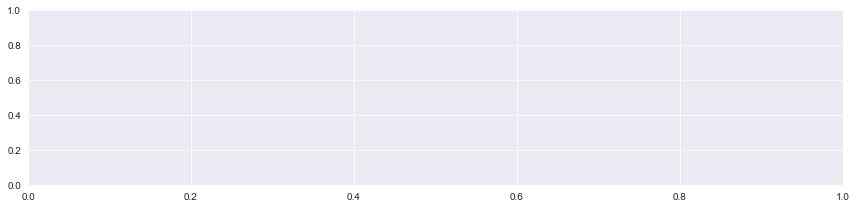

In [94]:
sns.FacetGrid(titanic_df, hue = 'sex', aspect = 4) #aspect ratio is 4

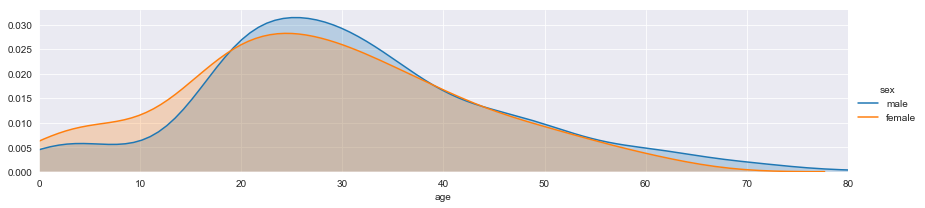

In [95]:
fig = sns.FacetGrid(titanic_df, 
                    hue = 'sex', 
                    aspect = 4) #aspect ratio is 4

fig.map(sns.kdeplot, 'age', shade = True)
oldest = titanic_df.loc[:, 'age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

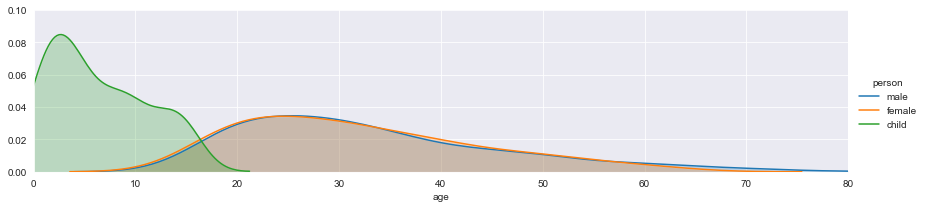

In [98]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4) #aspect ratio is 4
fig.map(sns.kdeplot, 'age', shade = True)

oldest = titanic_df.loc[:, 'age'].max()
fig.set(xlim = (0,oldest))

fig.set(ylim = (0,.1))

fig.add_legend()

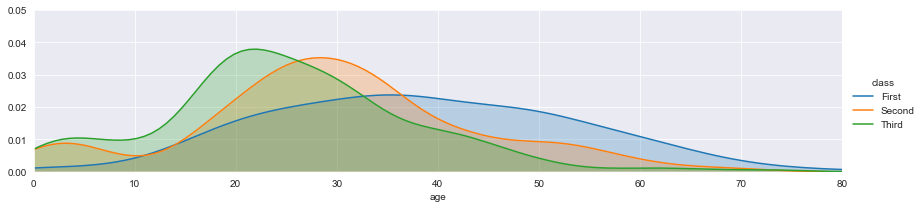

In [100]:
fig = sns.FacetGrid(titanic_df, hue = 'class', aspect = 4) #aspect ratio is 4
fig.map(sns.kdeplot, 'age', shade = True)
oldest = titanic_df.loc[:, 'age'].max()
fig.set(xlim = (0,oldest))
fig.set(ylim = (0,.05))
fig.add_legend()

In [101]:
# deck and class relation
titanic_df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,person
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,female


In [108]:
deck = titanic_df.loc[:,'class'].dropna()
deck.head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): [First, Second, Third]

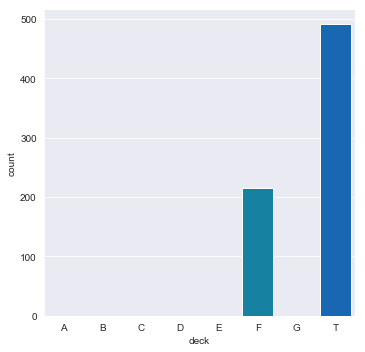

In [109]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df =pd.DataFrame(levels)
cabin_df.columns = ['deck']
d = ['A', 'B', 'C', 'D','E', 'F', 'G', 'T']
sns.catplot(x = 'deck', data = cabin_df, 
               kind = 'count', palette  = 'winter_d', 
               order = d)

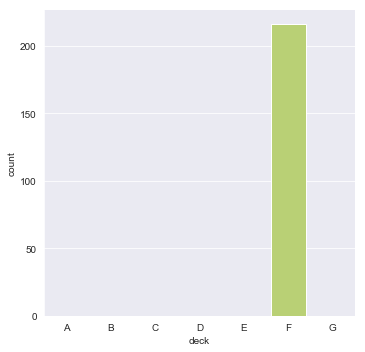

In [111]:
# excluding the T

cabin_df = cabin_df.loc[cabin_df.loc[:,'deck'] != 'T',:]
d = ['A', 'B', 'C', 'D','E', 'F', 'G']
sns.catplot(x = 'deck', data = cabin_df, 
               kind = 'count', palette  = 'summer',
               order = d) 

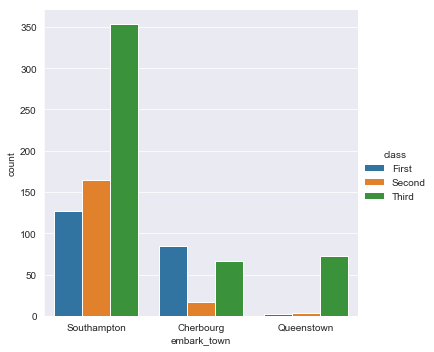

In [115]:
# where the passenger come from
sns.catplot('embark_town', 
            data = titanic_df, 
            kind = 'count',
            hue = 'class')

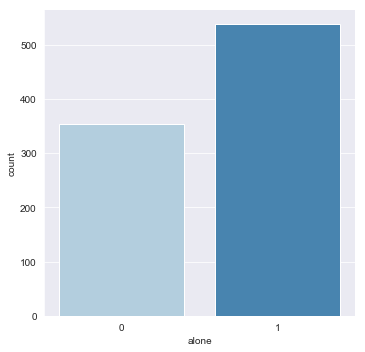

In [119]:
# whos alone and who was with fam?

sns.catplot(x = 'alone', kind = 'count',
               data = titanic_df, palette='Blues',
              order = [0,1])

In [120]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,person
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True,male


In [123]:
titanic_df['survivor'] = titanic_df['survived'].map({0:'no',1:'yes'})
titanic_df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,person,Survivor,survivor
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,male,no,no
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,female,yes,yes


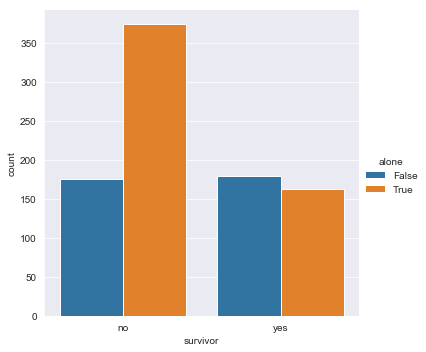

In [125]:
sns.catplot(x = 'survivor', 
            data = titanic_df, 
            hue = 'alone',
            kind = 'count')

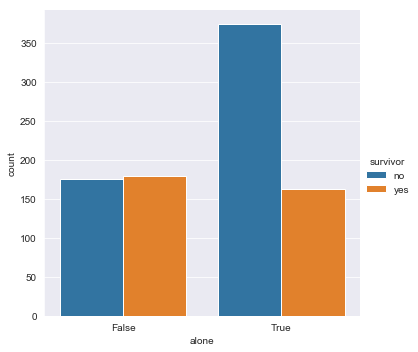

In [126]:
sns.catplot(x = 'alone', 
            data = titanic_df,
            hue = 'survivor', 
            kind = 'count')

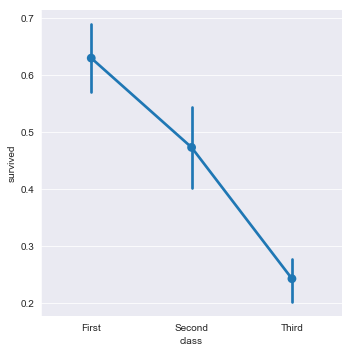

In [132]:
sns.catplot(x = 'class', 
            y = 'survived', 
            kind = 'point', 
            data = titanic_df)

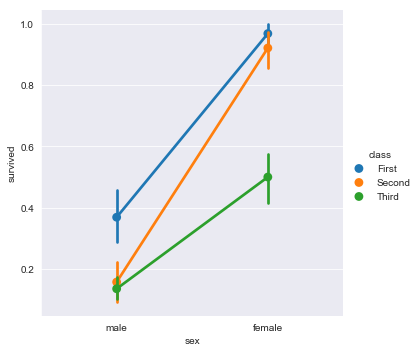

In [134]:
sns.catplot(x="sex", 
            y="survived", 
            hue="class",
            kind="point", 
            data=titanic_df);

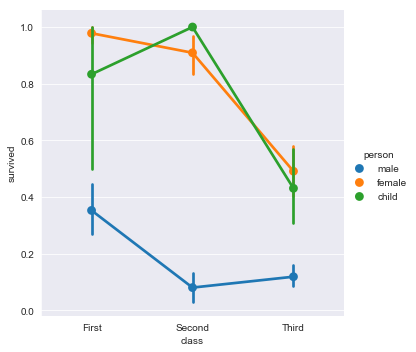

In [136]:
sns.catplot(x = 'class', y = 'survived', 
            hue = 'person', kind = 'point',
            data = titanic_df)

In [142]:
# 100 % child in Pclass 2 survived!
titanic_df.loc[(titanic_df.loc[:,'pclass'] == 2)  & (titanic_df.loc[:,'person'] == 'child'),:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,person,Survivor,survivor
9,1,2,female,14.00,1,0,30.0708,C,Second,False,NaN,Cherbourg,yes,False,child,yes,yes
43,1,2,female,3.00,1,2,41.5792,C,Second,False,NaN,Cherbourg,yes,False,child,yes,yes
58,1,2,female,5.00,1,2,27.7500,S,Second,False,NaN,Southampton,yes,False,child,yes,yes
78,1,2,male,0.83,0,2,29.0000,S,Second,False,NaN,Southampton,yes,False,child,yes,yes
183,1,2,male,1.00,2,1,39.0000,S,Second,False,F,Southampton,yes,False,child,yes,yes
193,1,2,male,3.00,1,1,26.0000,S,Second,False,F,Southampton,yes,False,child,yes,yes
237,1,2,female,8.00,0,2,26.2500,S,Second,False,NaN,Southampton,yes,False,child,yes,yes
340,1,2,male,2.00,1,1,26.0000,S,Second,False,F,Southampton,yes,False,child,yes,yes
407,1,2,male,3.00,1,1,18.7500,S,Second,False,NaN,Southampton,yes,False,child,yes,yes
446,1,2,female,13.00,0,1,19.5000,S,Second,False,NaN,Southampton,yes,False,child,yes,yes


In [141]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,person,Survivor,survivor
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,male,no,no
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,female,yes,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,female,yes,yes
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,female,yes,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True,male,no,no


In [156]:
# almost 100% female in PClass1 survived
titanic_df.loc[(titanic_df.loc[:,'pclass'] == 1)  & (titanic_df.loc[:,'person'] == 'female'),:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,person,Survivor,survivor
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,female,yes,yes
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,female,yes,yes
11,1,1,female,58.0,0,0,26.5500,S,First,False,C,Southampton,yes,True,female,yes,yes
31,1,1,female,NaN,1,0,146.5208,C,First,False,B,Cherbourg,yes,False,female,yes,yes
52,1,1,female,49.0,1,0,76.7292,C,First,False,D,Cherbourg,yes,False,female,yes,yes
61,1,1,female,38.0,0,0,80.0000,NaN,First,False,B,NaN,yes,True,female,yes,yes
88,1,1,female,23.0,3,2,263.0000,S,First,False,C,Southampton,yes,False,female,yes,yes
136,1,1,female,19.0,0,2,26.2833,S,First,False,D,Southampton,yes,False,female,yes,yes
151,1,1,female,22.0,1,0,66.6000,S,First,False,C,Southampton,yes,False,female,yes,yes
166,1,1,female,NaN,0,1,55.0000,S,First,False,E,Southampton,yes,False,female,yes,yes


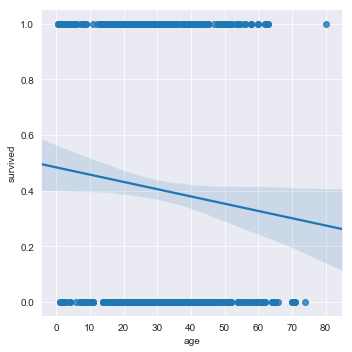

In [145]:
# is age a factor??
sns.lmplot(x = 'age', y ='survived', data = titanic_df)

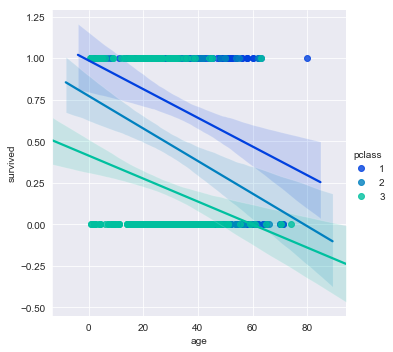

In [150]:
sns.lmplot(x = 'age', y ='survived',
           palette = 'winter', hue = 'pclass',
           data = titanic_df)

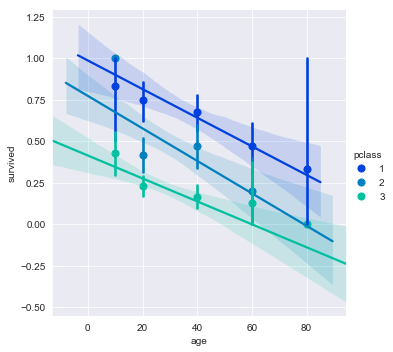

In [151]:
generations = [10,20,40,60,80]

sns.lmplot(x = 'age', y ='survived', palette = 'winter', 
           hue = 'pclass', data = titanic_df, x_bins = generations)

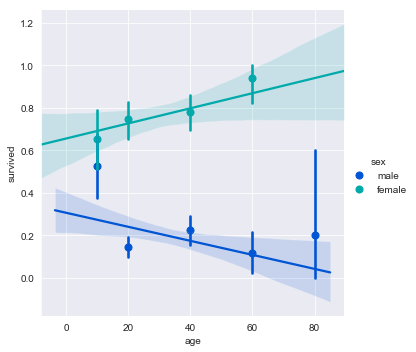

In [153]:
sns.lmplot(x = 'age', y ='survived', 
           palette = 'winter', hue = 'sex', 
           data = titanic_df, x_bins = generations)
# if you're older female you will have more chance of surviving